# Identifying Pulsar Stars Using Integrated and DM-SNR Profiles #
#### Katie Liang and Madilyn Portas ####
***

### INTRODUCTION ###

***

### METHODS AND RESULTS ###

In [28]:
# 1 
# loading libraries
library(tidyverse)
library(tidymodels)
library(dplyr)
library(RColorBrewer)
library(repr)
install.packages('kknn')
library('kknn')

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [29]:
# 2
# load data
url <- "https://raw.githubusercontent.com/madiportas/dsci-100_group_project/main/HTRU_2.csv"
pulsar_raw <- read.csv(url) |>
              rename(ip_mean = integrated_profile_mean,
                     ip_sd = integrated_profile_sd,
                     ip_ek = integrated_profile_ek,
                     ip_s = integrated_profile_s,
                     DM_mean = DM.SNR_curve_mean, 
                     DM_sd = DM.SNR_curve_sd, 
                     DM_ek = DM.SNR_curve_ek,
                     DM_s = DM.SNR_curve_s)

# wrangle data, remove uneeded columns
pulsar <- pulsar_raw |>
    mutate(class = as.factor(class), class = recode(class, "0" = "Not Pulsar", "1" = "Pulsar"))|>
    select(ip_mean, DM_mean, class)|>
    slice(1:1000)

# split data 
set.seed(1)
pulsar_split <- initial_split(pulsar, prop = 0.75, strata = class)
pulsar_train <- training(pulsar_split)
pulsar_test <- testing(pulsar_split)

In [30]:
# 3 
# summarize data as part of preliminary data analysis
summary <- group_by(pulsar_train, class) |>
    summarize(
        mean_ip = mean(ip_mean),
        max_ip = max(ip_mean), 
        min_ip = min(ip_mean), 
        mean_DM = mean(DM_mean),
        max_DM = max(DM_mean), 
        min_DM = min(DM_mean))
summary

class,mean_ip,max_ip,min_ip,mean_DM,max_DM,min_DM
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Not Pulsar,116.98682,163.7969,59.35156,6.273965,211.9490,0.3871237
Pulsar,58.50586,123.4688,11.21875,42.918816,176.1196,0.9581940


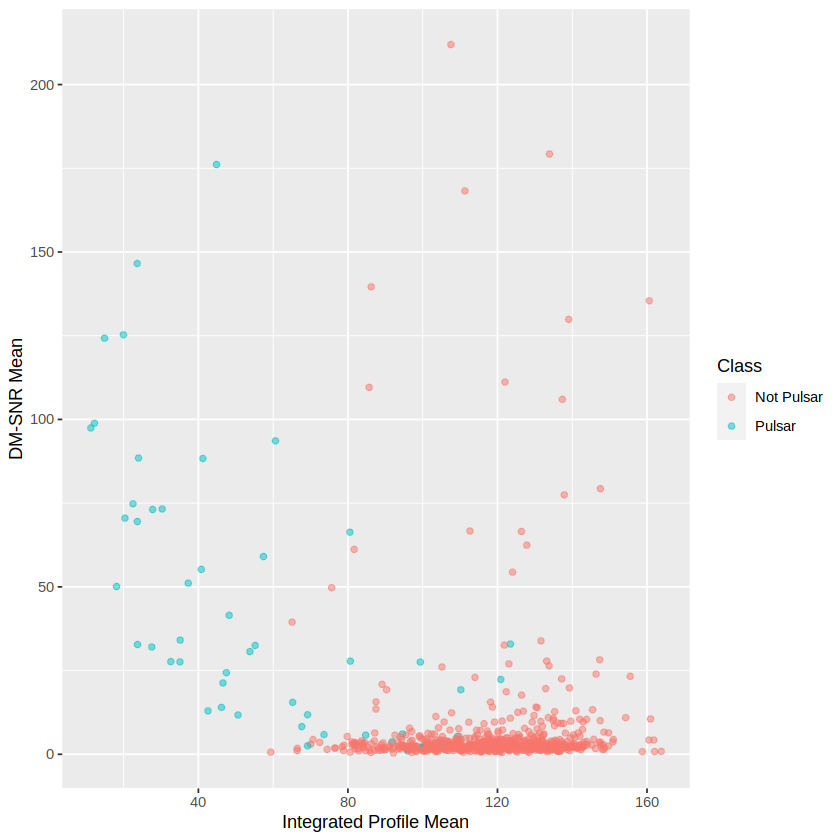

In [31]:
# 4 
# visualize data as part of preliminary data analysis
pulsar_plot <- ggplot(pulsar_train, aes(x = ip_mean, y = DM_mean, color = class)) +
        geom_point(alpha = 0.5) +
        labs (x = "Integrated Profile Mean", y = "DM-SNR Mean", color = "Class")
pulsar_plot

In [37]:
# 5 
# KNN classification 
pulsar_recipe <- recipe(class ~ ip_mean + DM_mean, data = pulsar_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())
pulsar_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

***

### DISCUSSION ###

***

### REFERENCES ###

***